#                  **Car Price Prediction** 🚐 🤑





#### Importation des bibliothèques nécessaires :

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#### Charger le jeu de données à partir du fichier CAR DETAILS FROM CAR DEKHO.csv :

In [2]:
data = pd.read_csv("/content/sample_data/CAR DETAILS.csv")
data.head(100)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
95,Fiat Avventura MULTIJET Emotion,2015,350000,53000,Diesel,Individual,Manual,Second Owner
96,Audi A8 4.2 TDI,2013,2800000,49000,Diesel,Dealer,Automatic,First Owner
97,Datsun RediGO 1.0 S,2017,210000,15000,Petrol,Dealer,Manual,Second Owner
98,Volkswagen Jetta 1.4 TSI Comfortline,2013,450000,50000,Petrol,Individual,Manual,First Owner


In [3]:
data.shape

(4340, 8)

In [103]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [104]:
data.duplicated().sum()

763

Dans ce fichier il y a 763 doublons.

**Suppression des doublons**

In [105]:
data.drop_duplicates(keep = 'first', inplace=True)

In [106]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


#### Exploration des données :
Utilisez la fonction de description pour voir les statistiques clés.

In [107]:
data.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


#### Le nombre de véhicules par marque

<function matplotlib.pyplot.show(*args, **kw)>

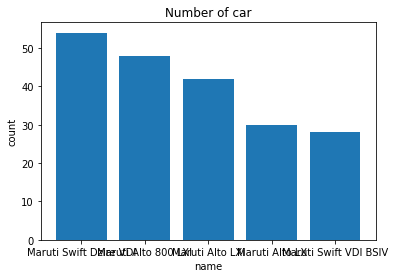

In [108]:
y = data['name'].value_counts().head(5)
y_label=y.keys()
plt.bar(y_label,y)
plt.title("Number of car")
plt.xlabel("name")
plt.ylabel("count")
plt.show

#### Les prix des véhicules vendus en fonction du carburant.



Text(0.5, 1.0, 'Price vs fuel')

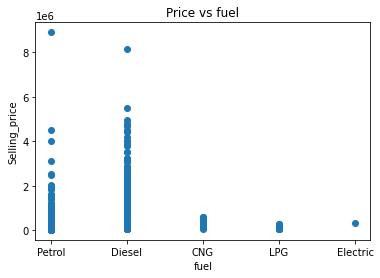

In [109]:
plt.scatter(data.fuel, data.selling_price)
plt.xlabel("fuel")
plt.ylabel("Selling_price")
plt.title("Price vs fuel")

###Les prix des véhicules vendus en fonction du carburant.

Text(0.5, 1.0, 'Selling_Price vs Transmission')

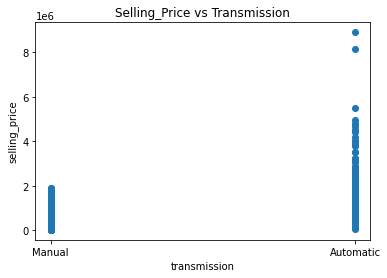

In [127]:
plt.scatter(data.transmission, data.selling_price)
plt.xlabel("transmission")
plt.ylabel("selling_price")
plt.title("Selling_Price vs Transmission")

### Le nombre de véhicules vendus en fonction des seller.


<function matplotlib.pyplot.show(*args, **kw)>

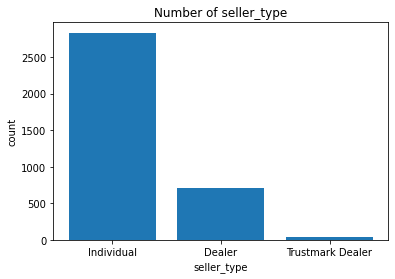

In [129]:
y = data['seller_type'].value_counts()
y_label=y.keys()
plt.bar(y_label,y)
plt.title("Number of seller_type")
plt.xlabel("seller_type")
plt.ylabel("count")
plt.show

###Etude des corrélations entre différents paramètres 

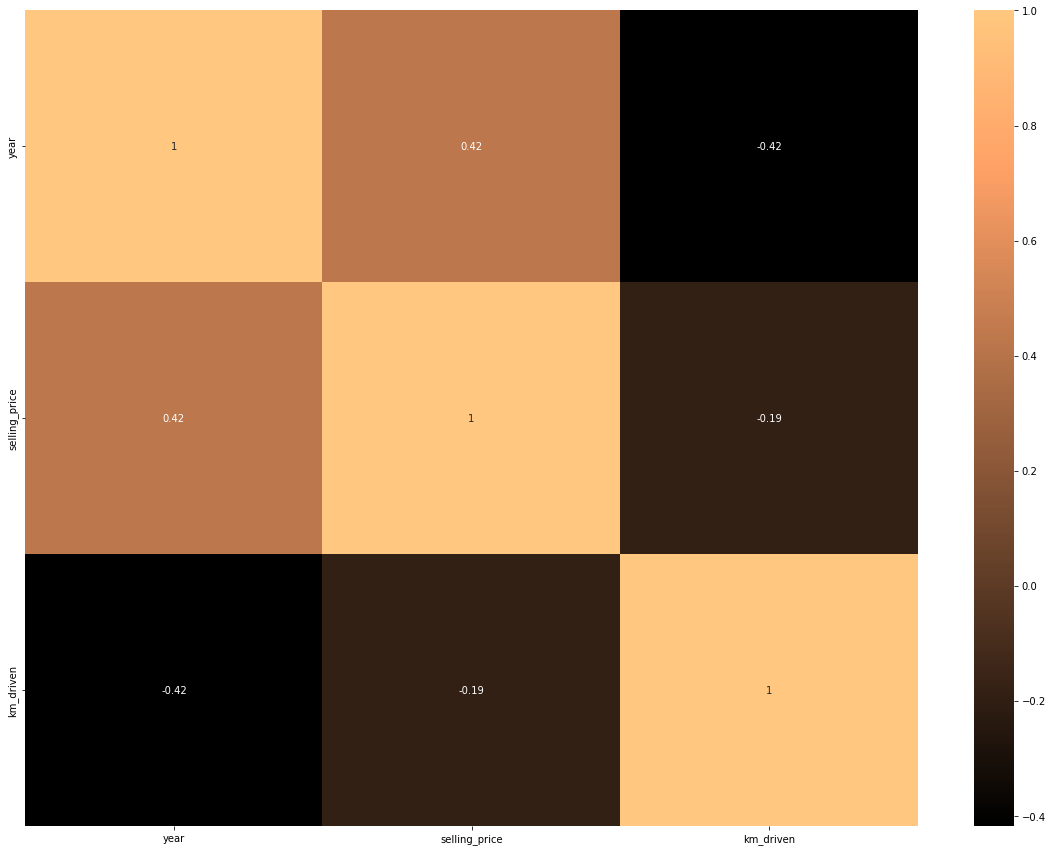

In [111]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 15))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(), annot=True, cmap="copper")

In [112]:
data.corr().style.background_gradient(cmap = "copper")

,year,selling_price,km_driven
year,1.000000,0.424260,-0.417490
selling_price,0.424260,1.000000,-0.187359
km_driven,-0.417490,-0.187359,1.000000


### Analyse prédictive ML: Régression Linéaire



In [113]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
labels = data['selling_price']


data_cleaned = data.drop(['name','selling_price'], axis=1)
data_cleaned = pd.get_dummies(data_cleaned, drop_first = True)


In [114]:
data_cleaned.tail()

,year,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
4335,2014,80000,1,0,0,0,1,0,1,0,1,0,0
4336,2014,80000,1,0,0,0,1,0,1,0,1,0,0
4337,2009,83000,0,0,0,1,1,0,1,0,1,0,0
4338,2016,90000,1,0,0,0,1,0,1,0,0,0,0
4339,2016,40000,0,0,0,1,1,0,1,0,0,0,0


In [115]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(data_cleaned, labels, test_size = 0.20, random_state =5)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)
reg.fit(x_train, y_train)
reg.score(x_test, y_test)

x train:  (2861, 13)
x test:  (716, 13)
y train:  (2861,)
y test:  (716,)


0.49144638816810104

In [116]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2,
          learning_rate=0.1, loss='squared_error')

In [117]:
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.42619323455381686

In [118]:
predictions = clf.predict(x_test)
predictions[:10]

array([ 139391.52750924,   59258.00820462,  921115.31405914,
        499062.93799697,  490374.19645702,  459628.29800811,
       2010841.25714592,  458648.41201913,  570287.57870124,
         98221.14876251])

In [124]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = reg.predict(x_test)
#The coefficients
print('Coefficients: ', reg.coef_)

# The mean squared error
print('\nMean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('\nCoefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients:  [ 3.26847973e+04 -9.46630478e-01  2.76183529e+05 -5.02240191e+05
  4.04686060e+04  9.06840344e+03 -5.34406374e+04  1.26151482e+05
 -7.70462664e+05 -2.23146109e+04 -6.17694855e+04  1.15691647e+05
 -5.29645361e+04]

Mean squared error: 121333677952.40

Coefficient of determination: 0.49


Selon les résultats statistique obténu, nous pouvons améliorer le model.